# Détection d'anomalies dans les séries chronologiques à l'aide d'autoencodeurs LSTM avec PyTorch en Python

#### Définir les autoencodeurs et leurs rôles

```
Les auto encodeurs sont des réseaux de neurones qui possèdent exactement le même nombre de neurones sur leur couche d’entrée et leur couche de sortie. Le but pour un auto encodeur est d’avoir une sortie la plus proche de l’entrée en minimisant le coût de reconstruction.

Lors de l’apprentissage, l’auto encodeur va donc apprendre à chercher les informations les plus essentielles pour reconstruire la sortie. Ainsi, l’encodeur apprend les composantes les plus importantes d’une entrée pour avoir la meilleure compression possible. 
```

#### Définir la bibliothèque PyTorch 

```
PyTorch est une bibliothèque d'IA, développée par Meta (ex-Facebook), écrite en Python.
PyTorch est disponible depuis 2016 en open source sous licence BSD Modifiée. En 2018, la librairie est fusionnée par Meta avec Caffe2, son infrastructure de deep learning taillée pour les déploiements et capable de prendre en charge des algorithmes d'apprentissage ingérant jusqu'à des dizaines de milliards de paramètres.
```

In [58]:

#Importez les bibliothèques torch, copy, pandas, seaborn, rcParams (from pylab)
#Remplissez ce champ, au fur et à mesure avec les bibliothèques nécessaires 

import torch, copy, os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pylab import rcParams
from sklearn.model_selection import train_test_split

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

Dans ce brief, nous allons apprendre à détecter les anomalies dans les données de séries temporelles à l'aide d'un autoencodeur LSTM. Vous allez utiliser les données d'ECG (Electrocardiographie) du monde réel d'un seul patient souffrant d'une maladie cardiaque pour détecter les battements de cœur anormaux.

**Importer les deux datasets "train" et "test" et assignez les respectivement dans les dataFrame "tr" et "ts"**  
(Remarque: le délimiteur est un ";").

In [22]:
tr = pd.read_csv('train.csv', sep = ';')
tr.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,Unnamed: 140
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.159100,-1.551951,-2.442733,-3.098292,-3.177269,-2.899259,-2.286133,-1.800159,-1.429717,-0.948419,...,0.049037,-0.085459,-0.300097,-0.552943,-0.825774,-0.929637,-0.750090,-0.602488,-0.805451,1.5240
std,1.140292,1.416321,1.400143,1.325583,1.128045,0.904602,0.697134,0.575725,0.587910,0.637730,...,1.353449,1.594624,1.857173,2.025423,2.076705,2.106171,1.955936,1.946638,1.438395,0.7527
min,-3.694197,-5.117621,-5.110389,-5.060774,-5.375715,-5.056184,-3.960660,-3.066900,-2.906713,-2.698503,...,-3.560666,-4.006379,-4.212592,-4.526051,-5.150100,-4.872557,-4.959774,-5.639460,-5.797645,1.0000
25%,-0.928707,-2.644930,-3.617218,-4.251520,-4.022823,-3.537361,-2.779345,-2.182877,-1.786397,-1.393333,...,-0.965218,-1.485576,-2.038443,-2.654917,-3.075720,-3.032576,-2.315601,-1.970478,-1.663648,1.0000
50%,-0.216883,-1.539340,-2.513000,-3.309532,-3.541513,-3.008340,-2.298235,-1.761069,-1.438962,-0.929379,...,0.438875,0.652819,0.585367,0.320551,-0.125691,-0.254106,-0.292570,-0.233793,-0.663025,1.0000
75%,0.582008,-0.595632,-1.448769,-2.199136,-2.546305,-2.432860,-1.847942,-1.489967,-1.108815,-0.484015,...,1.147758,1.215568,1.239330,1.186627,1.016514,0.933622,0.960665,1.002865,0.222464,2.0000
max,4.058127,2.087844,1.592974,1.423006,1.014557,0.610640,0.778013,0.812531,1.136212,1.455688,...,2.602337,2.723053,2.912394,2.630759,2.852050,2.959741,2.613987,2.589474,2.854707,5.0000


In [23]:
ts = pd.read_csv('test.csv', sep = ';')
ts.describe()


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,Unnamed: 140
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,-0.273962,-1.660351,-2.497708,-3.121793,-3.166346,-2.862646,-2.271681,-1.797901,-1.407947,-0.934711,...,0.073410,-0.060409,-0.273551,-0.502636,-0.753850,-0.824197,-0.630282,-0.474437,-0.694958,1.527778
std,1.153257,1.448446,1.384922,1.300375,1.101844,0.906330,0.735420,0.628203,0.642411,0.660208,...,1.410561,1.652410,1.899489,2.063698,2.087378,2.050563,1.848085,1.817460,1.411511,0.761301
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.259295,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-4.911417,-4.880460,-5.496107,-5.880890,-6.092227,1.000000
25%,-1.018202,-2.710514,-3.675967,-4.221921,-4.006748,-3.472986,-2.779941,-2.164166,-1.773173,-1.360472,...,-1.104062,-1.598281,-2.157220,-2.743237,-3.014821,-2.856324,-2.131719,-1.635179,-1.577515,1.000000
50%,-0.303240,-1.672456,-2.592071,-3.397653,-3.460329,-2.938500,-2.282163,-1.748535,-1.420713,-0.909183,...,0.676028,0.732593,0.608052,0.335153,-0.025628,-0.180293,-0.191248,-0.144524,-0.551293,1.000000
75%,0.485655,-0.684776,-1.519119,-2.240458,-2.530796,-2.397532,-1.822741,-1.483616,-1.059521,-0.476321,...,1.173172,1.239463,1.267172,1.237470,1.037941,0.947254,0.948825,1.002692,0.277078,2.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912134,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,5.000000


**Nous allons combiner les données de training et de test en un seul dataFrame. Cela nous donnera plus de données pour entraîner notre autoencodeur. Nous allons également les mélanger:**

In [24]:
df = pd.concat([tr, ts])
df = df.sample(frac=1).reset_index(drop = True)

In [25]:
#Affichez un aperçu 

df.head(10)

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,Unnamed: 140
0,-1.461036,-3.694497,-4.338064,-4.352150,-4.027225,-3.480386,-2.008748,-1.313345,-1.111645,-0.442795,...,0.936000,1.132870,1.065463,0.951055,0.646349,0.796355,1.090618,0.424267,-1.901421,1
1,0.883159,-0.759310,-2.628565,-4.117845,-4.338255,-3.528236,-2.512334,-1.855844,-1.637926,-0.942783,...,1.404509,1.675578,2.094587,2.177011,1.821510,1.167246,0.817841,1.256876,0.165824,1
2,-1.530214,-1.997999,-1.927152,-2.463646,-2.419654,-2.299942,-2.118728,-1.806651,-1.467962,-0.941041,...,-2.122940,-2.891670,-3.717853,-4.014832,-3.872671,-3.161674,-2.100360,-1.896710,-0.731388,2
3,1.078572,-1.152037,-2.712268,-3.702277,-4.537162,-3.794368,-2.446789,-1.729855,-1.515999,-0.405619,...,0.406030,1.178879,1.303537,1.656051,1.641966,1.603795,1.222840,0.572081,1.062028,1
4,0.109517,-0.244626,-0.780074,-1.049431,-1.256571,-1.553503,-1.777700,-1.796117,-1.676495,-1.412903,...,-1.932396,-2.601818,-3.360360,-3.942239,-4.281020,-4.142634,-3.362297,-2.769953,-1.609311,2
5,-0.338822,-1.670724,-3.040589,-4.175229,-4.299424,-3.549401,-2.468915,-1.781773,-1.552058,-0.865544,...,1.728927,1.874774,2.237946,2.118211,1.523045,0.781780,0.390808,0.612616,-0.146795,1
6,-1.128814,-2.038117,-2.384954,-3.105648,-3.014970,-2.772561,-2.405708,-1.865114,-1.327811,-0.850339,...,-1.874524,-2.370187,-3.194264,-3.671344,-3.561135,-3.059398,-1.891961,-1.136140,0.077307,2
7,-0.100116,-2.352734,-4.127956,-4.425552,-4.362354,-4.084848,-3.246232,-1.865253,-1.280394,-0.935507,...,0.873581,1.079805,1.169158,1.261764,1.082071,0.799359,0.868221,1.090843,-0.119246,1
8,-0.757178,-3.396066,-4.089193,-4.307271,-3.673054,-2.558748,-1.797710,-1.558311,-0.826008,-0.454440,...,0.986183,1.317548,1.045827,1.000235,0.720204,0.724679,0.554332,0.991150,0.886523,1
9,-0.418828,-1.256109,-2.062180,-2.508502,-2.639580,-2.517016,-2.284097,-1.945279,-1.264099,-0.816035,...,-0.249821,-1.099008,-2.040666,-3.107655,-4.108462,-4.402550,-3.808157,-2.711431,-2.016510,2


Nous avons 5000 exemples. Chaque ligne représente un seul enregistrement de battement de cœur. Nommons les classes possibles et qui sont (en Anglais): 

- Normal (N)
- R-on-T Premature Ventricular Contraction (R-on-T PVC)
- Premature Ventricular Contraction (PVC)
- Supra-ventricular Premature or Ectopic Beat (SP or EB)
- Unclassified Beat (UB).

Créer une liste "class_names" des (abréviations) des classes ci-dessus: 

In [26]:
class_names = ['N', 'R-on-T PVC', 'PVC', 'SP or EB', 'UB']

Ensuite, nous allons renommer la dernière colonne en `target`, pour que ça soit plus facile de la référencer :

In [27]:
df.columns = [*df.columns[:-1], 'target']

## Analyse et Exploration des données

Vérifions le nombre d'exemples nous avons pour chaque classe de battements de cœur :


In [28]:
classe_resum = df['target'].value_counts()
classe_resum

1    2919
2    1767
4     194
3      96
5      24
Name: target, dtype: int64

Traçons les résultats avec seaborn


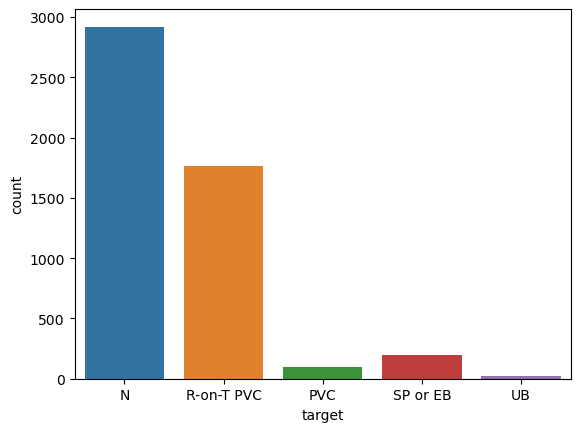

In [32]:
#histogramme présentant le nombre des exemples pour chaque classe 

ax = sns.countplot(data = df, x = 'target')
ax.set_xticklabels(class_names)
plt.show()

La classe 'Normale' a, de loin, le plus d'exemples. C'est une bonne chose car nous allons l'utiliser pour entraîner notre modèle.

Jetons un coup d'œil à la série temporelle moyenne (lissée avec un écart type en haut et en bas) pour chaque classe. 

In [33]:
#Compléter le code suivant: 
def plot_time_series_class(data, classes, ax, steps = 10):
  df = pd.DataFrame(data)

  smooth_path = df.rolling(steps).mean()
  path_deviation = 2 * df.rolling(steps).std()

  under_line = (smooth_path - path_deviation)[0]
  over_line = (smooth_path + path_deviation)[0]

  ax.plot(smooth_path, linewidth=2)
  ax.fill_between(
    path_deviation.index,
    under_line,
    over_line,
    alpha=.125
  )
  ax.set_title(classes)


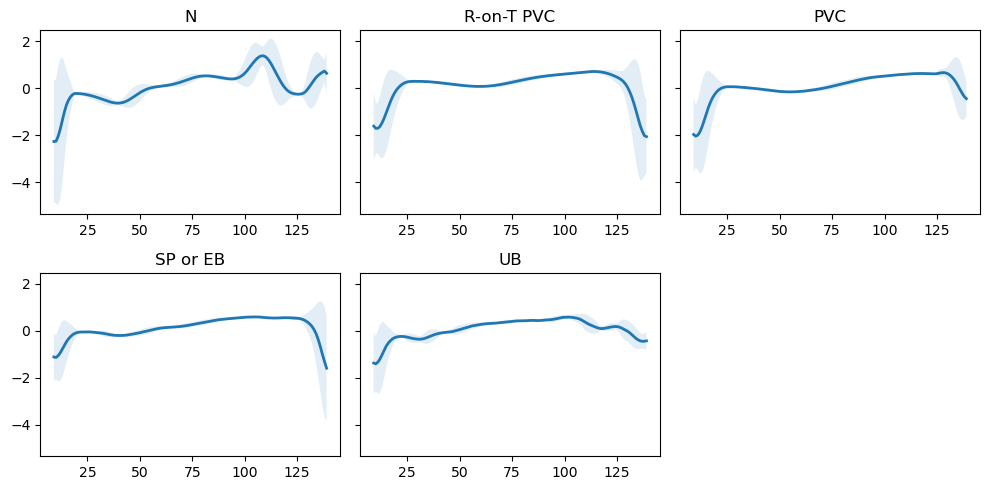

In [38]:
#  Commenter le code suivant (objectif de chaque instruction)
classes = df.target.unique() # classes contient les 5 valeurs distincs de df['target']

# On créé un ensemble de graphiques (3 par ligne, 2 lignes). sharey veut dire que tous les digramme ont le meme axe y. La taille de l'ensemble des graphique est de 14 par 8.
fig, axs = plt.subplots(
  nrows=len(classes) // 3 + 1,
  ncols=3,
  sharey=True,
  figsize=(10, 5)
)


for i, cls in enumerate(classes): # On itère chaque classe (i sa position dans la liste, cls la classe)
  ax = axs.flat[i] # On applatit l'ensemble des graphique (on avait 2 lignes et 3 colonnes, maintenant on a 6 graphique à la suite(pour mieux les parcourir)) et on séléctionne le graphique i
  
  # On prend le dataframe où la valeur de la colonne 'target' est la classe itéré.
  # On ne garde que les données (supprime 'target')
  # On calcul la moyenne de chaque colonne
  # On convertit le tout en format numpy
  data = df[df.target == cls].drop(labels='target', axis=1).mean(axis=0).to_numpy()
  
  plot_time_series_class(data, class_names[i], ax) # Appelle de la fonction précedente pour créé un graphique et l'intégrer à notre ensemble

fig.delaxes(axs.flat[-1]) # On supprime le dernier graphique (vide car 5 classes en sorties mais 6 graphiques initialisés)
fig.tight_layout() # On 'compact' l'ensemble des graphiques pour prendre moins de place

Interpetez les deux dernières fonctions qu'on a définies

```
Ces deux fonctions nous permettent de visualiser les séries temporelles pour chaque sortie unique.
Des courbes sont créées représentant la moyenne de chaque colonne du dataframe avec une représentation de l'ecart-type en 'zone pâle'. 
On peut ainsi visualiser quel genre de données donne tel ou tel sortie, en moyenne.
```

## Détection d'anomalies dans les données ECG

Nous allons utiliser des battements de cœur normaux comme données d'entraînement pour notre modèle et enregistrer la *perte de reconstruction*. Mais d'abord, nous devons préparer les données :

### Prétraitement des données

Récupérons tous les battements de cœur normaux et supprimons la colonne cible ('target') :

In [46]:
normal_df = df[df['target'] == 1].drop('target', axis = 1).reset_index(drop = True)
normal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 140 entries, att1 to att140
dtypes: float64(140)
memory usage: 3.1 MB


Nous allons fusionner toutes les autres classes et les marquer comme des anomalies :

In [47]:
anomaly_df = df[df['target'] != 1].drop('target', axis=1).reset_index(drop = True)
anomaly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Columns: 140 entries, att1 to att140
dtypes: float64(140)
memory usage: 2.2 MB


Nous allons diviser les exemples normaux en ensembles de training, de validation et de test :

In [67]:
#diviser les données de la classe 'normale' en données de 'train' (85%) et de 'validation' (15%) 

X_train, validation = train_test_split(normal_df, test_size = 0.15, random_state = 1)

#Reprendre 1/3 des données de validation pour le 'test' .

x_val, x_test = train_test_split(validation, test_size = 1/3, random_state = 1)


In [57]:
print(f"train ({len(X_train)}) : {round(len(X_train) / normal_df.shape[0] * 100)}%")
print(f"val ({len(x_val)}) : {round(len(x_val) / normal_df.shape[0] * 100)}%")
print(f"test ({len(x_test)}) : {round(len(x_test) / normal_df.shape[0] * 100)}%")

train (2481) : 85%
val (292) : 10%
test (146) : 5%


Nous devons convertir nos exemples en tenseurs ('torch.tensor'), afin de pouvoir les utiliser pour entraîner notre autoencodeur. 

In [68]:
#commenter le code suivant (objectif de chaque instruction)

def create_dataset(df):

# Les valeurs du dataframe sont convertis en float 32 bits, puis le dataframe est transformés en liste numpy ou chaque ligne du dataframe est une liste (donc on a une nested liste numpy)
  sequences = df.astype(np.float32).to_numpy().tolist()

# Chaque element de 'sequences' (donc des listes) est transormé en tenseur pytorch, puis on ajoute une dimension supplémentaire à chaque tenseur avec 'unsqueeze(1)' et enfin on convertit chaque nombre en float() (encore ?)
  dataset = [torch.tensor(s).unsqueeze(1) for s in sequences]

# torch.stack(dataset).shape nous donne le nombre total de séquences, la longueur de chaque séquence et le nombre de fonctionnalités dans chaque séquence.
  n_seq, seq_len, n_features = torch.stack(dataset).shape

  return dataset, seq_len, n_features


Chaque série temporelle sera convertie en un tenseur 2D de la forme longueur de la séquence x nombre de caractéristiques (140x1 dans notre cas).
**Les dataset à utiliser sont prédéfinis ci-dessous:**

In [84]:
train_dataset, seq_len, n_features = create_dataset(X_train)

val_dataset, seq_len, n_features = create_dataset(x_val)

test_dataset, seq_len, n_features = create_dataset(x_test)

test_anomaly_dataset, seq_len, n_features = create_dataset(anomaly_df)


140 1
140 1
140 1
140 1


### LSTM Autoencoder


Définir & déderminer l'architecture d'un autoencoder LSTM


![Image](Autoencoder.jpg)

```
Dans un réseau autoencoder, les couches cachées sont plus petites que les couches d’entrée. On appelle ce type d’architecture une architecture « bottleneck ». On peut décomposer un auto encodeur en deux parties à gauche et à droite de ce « bottleneck ».

La partie gauche s’appelle l’encodeur. L’encodeur transforme l’entrée en une représentation dans un espace de dimension plus faible appelé espace latent. L’encodeur compresse donc l’entrée dans une représentation moins coûteuse.

La partie droite est appelée décodeur, car elle doit reconstruire à l’aide de la représentation latente de l’entrée, une sortie la plus fidèle à l’entrée.
```

Nous utiliserons l'autoencodeur LSTM de ce [dépôt GitHub](https://github.com/shobrook/sequitur) avec quelques petites modifications. Le travail de notre modèle est de reconstruire les données des séries temporelles. Commençons par le *Encodeur* :

In [73]:
class Encoder(torch.nn.Module):
  def __init__(self, seq_len, n_features, embedding_dim=64):
    super(Encoder, self).__init__()

    self.seq_len, self.n_features = seq_len, n_features
    self.embedding_dim, self.hidden_dim = embedding_dim, 2 * embedding_dim

    self.rnn1 = torch.nn.LSTM(
      input_size = n_features,
      hidden_size = self.hidden_dim,
      num_layers = 1,
      batch_first = True
    )
    
    self.rnn2 = torch.nn.LSTM(
      input_size = self.hidden_dim,
      hidden_size = embedding_dim,
      num_layers = 1,
      batch_first = True
    )

  def forward(self, x):
    x = x.reshape((1, self.seq_len, self.n_features))

    x, (hidden_n, cell_n) = self.rnn1(x)
    x, (hidden_n, cell_n) = self.rnn2(x)

    return hidden_n.reshape((self.n_features, self.embedding_dim))


Le *Encoder* utilise deux couches LSTM pour compresser les données de la série temporelle en entrée.
Ensuite, nous allons décoder la représentation compressée en utilisant un *Décodeur* :

Vous n'avez qu'a comprendre comment coder et décoder! Commentez le programme ci-dessous. 

In [72]:
class Decoder(torch.nn.Module):

# Initialisation des paramètres
  def __init__(self, seq_len, n_features=1, input_dim=64):
    super(Decoder, self).__init__()

    self.seq_len, self.input_dim = seq_len, input_dim # seq_len : longueur de la sequence d'entrée / input_dim : dimension de chaque vector de la sequence d'entrée
    self.hidden_dim, self.n_features = 2 * input_dim, n_features # hidden_dim : 2 fois la valeur de input_dim / n_feature : nombre de feature

  # Couche LSTM 1
    self.rnn1 = torch.nn.LSTM(
      input_size = input_dim,
      hidden_size = input_dim,
      num_layers = 1,
      batch_first = True
    )

  # Couche LSTM 2
    self.rnn2 = torch.nn.LSTM(
      input_size = input_dim,
      hidden_size = self.hidden_dim,
      num_layers = 1,
      batch_first = True
    )

  # Couche de sortie
    self.output_layer = torch.nn.Linear(self.hidden_dim, n_features)

  # Fonction d'execution.
  def forward(self, x):
    x = x.repeat(self.seq_len, self.n_features) # Le tenseur est cloné 'n_features' fois 
    x = x.reshape((self.n_features, self.seq_len, self.input_dim)) # Le tenseur est redimensionner 

    x, (hidden_n, cell_n) = self.rnn1(x) # Le tenseur est donné à la couche 1
    x, (hidden_n, cell_n) = self.rnn2(x) # Puis la sortie de la couche 1 est donné à la couche 2
    x = x.reshape((self.seq_len, self.hidden_dim)) # Le tenseur est redimensionné

    return self.output_layer(x) # On revoit le tenseur passé dans la dernière couche, qui renconstruit l'entrée

In [77]:
class RecurrentAutoencoder(torch.nn.Module):

# Initialisation des paramètres
  def __init__(self, seq_len, n_features, embedding_dim = 64):
    super(RecurrentAutoencoder, self).__init__()

    self.encoder = Encoder(seq_len, n_features, embedding_dim) # On donne à l'encoder la longueur de la sequence, le nombre de features et la dimension de l'espace latent
    self.decoder = Decoder(seq_len, n_features, embedding_dim) # On donne au decoder la longueur de la sequence, le nombre de features et la dimension de l'espace latent

# Fonction d'execution
  def forward(self, x):
    x = self.encoder(x) # On encode la sequence
    x = self.decoder(x) # On decode la sequence

    return x # On renvoie la sequence qui est passé dans le LSTM Autoencoder

Notre Autoencodeur fait passer l'entrée par l'Encodeur et le Décodeur. Créons une instance de celui-ci :

In [78]:
train_dataset, seq_len, n_features = create_dataset(X_train)

model = RecurrentAutoencoder(seq_len, n_features)

## Training

Écrivons une fonction d'aide pour notre processus de training:


In [88]:
def train_model(model, train_dataset, val_dataset, n_epochs):
    optimizer = torch.optim.Adam(model.parameters(), lr= 1e-3)
    criterion = torch.nn.L1Loss(reduction='sum')
  
    history = dict(train=[], val=[])              

    for epoch in range(1, n_epochs + 1):

        model = model.train()

        train_losses = []

        for seq_true in train_dataset:

            optimizer.zero_grad()

            seq_pred = model(seq_true)

            loss = criterion(seq_pred, seq_true) 

            loss.backward()      
            optimizer.step()
            train_losses.append(loss.item())

        val_losses = []
        model = model.eval()

        with torch.no_grad(): 
            for seq_true in val_dataset:
                seq_pred = model(seq_true)

                loss = criterion(seq_pred, seq_true)

                val_losses.append(loss.item())  

  
        train_loss = np.mean(train_losses)
        val_loss = np.mean(val_losses)
        history['train'].append(train_loss)
        history['val'].append(val_loss)
    
        print(f'Epoch {epoch}: train loss = {train_loss}, val loss = {val_loss}')

    return model.eval(), history

À chaque étape, le processus de training alimente notre modèle avec tous les exemples de training et évalue les performances sur l'ensemble de validation. Notez que nous utilisons une taille de lot de 1 (notre modèle ne voit qu'une seule séquence à la fois). Nous enregistrons également les pertes des ensembles d'apprentissage et de validation au cours du processus.

Notez que nous minimisons la perte L1Loss, qui mesure la MAE (erreur absolue moyenne). Pourquoi ? Les reconstructions semblent être meilleures qu'avec la MSE (erreur quadratique moyenne).

Nous obtiendrons la version du modèle avec la plus petite erreur de validation. Faisons un peu d'entraînement :

In [89]:
#Programme d'entraînement

model, history = train_model(model, train_dataset, val_dataset, n_epochs= 150)

Epoch 1: train loss = 49.46361988333626, val loss = 47.0204524797936
Epoch 2: train loss = 35.21408532791107, val loss = 30.873773303750443
Epoch 3: train loss = 32.1931789014571, val loss = 42.35403693865423
Epoch 4: train loss = 31.390756800404386, val loss = 25.538290046665768
Epoch 5: train loss = 27.304148730516722, val loss = 27.482923752641025
Epoch 6: train loss = 25.54072431459008, val loss = 25.7500164280199
Epoch 7: train loss = 24.79159030084022, val loss = 25.241583902541905
Epoch 8: train loss = 23.75237082128129, val loss = 22.273566177446547
Epoch 9: train loss = 22.79240524341194, val loss = 22.465742336560602
Epoch 10: train loss = 22.07704332191009, val loss = 22.604257580352154
Epoch 11: train loss = 21.040542659428944, val loss = 21.569807601301637
Epoch 12: train loss = 20.13424668048765, val loss = 18.60709228091044


KeyboardInterrupt: 

Notre modèle a bien convergé. Il semble que nous aurions eu besoin d'un ensemble de validation plus important pour lisser les résultats, mais cela suffira pour l'instant.

## Sauvegarder le modèle

Stockons le modèle pour une utilisation ultérieure :

In [90]:
torch.save(model, 'model.pth')

## Choix d'un seuil

Avec notre modèle en main, nous pouvons examiner l'erreur de reconstruction sur l'ensemble d'apprentissage. Commençons par écrire une fonction d'aide pour obtenir les prédictions de notre modèle :

In [91]:
def predict(model, dataset):
  predictions, losses = [], []
  criterion = torch.nn.L1Loss(reduction = 'sum')

  with torch.no_grad():
    model = model.eval()      
    for seq_true in dataset:
      seq_pred = model(seq_true)

      loss = criterion(seq_pred, seq_true)
      
      predictions.append(seq_pred.cpu().numpy().flatten())
      losses.append(loss.item())

  return predictions, losses

Notre fonction passe en revue chaque exemple de l'ensemble de données et enregistre les prédictions et les pertes. Récupérons les pertes et regardons-les :

In [92]:
_, losses = predict(model, train_dataset)

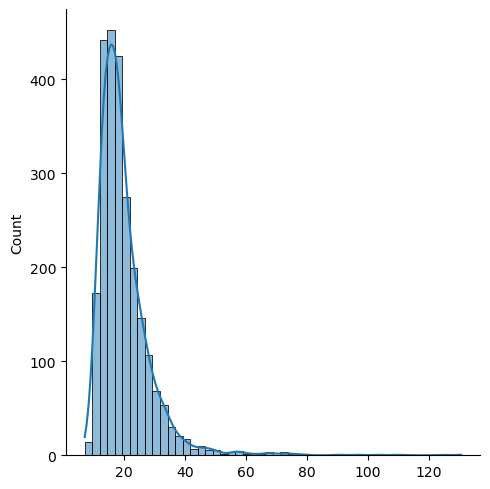

In [94]:
sns.displot(losses, bins= 50, kde= True)

## Évaluation

En utilisant le seuil, nous pouvons transformer le problème en une simple tâche de classification binaire :

- Si la perte de reconstruction pour un exemple est inférieure au seuil, nous le classerons comme un battement de cœur *normal*.
- Sinon, si la perte est supérieure au seuil, nous le classerons comme une anomalie.

### Battements de coeur normaux

Vérifions la performance de notre modèle sur des battements de cœur normaux. Nous utiliserons les battements de cœur normaux de l'ensemble de test (notre modèle ne les a pas vus) :

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_15528\994026187.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_losses, bins= 50, kde= True);


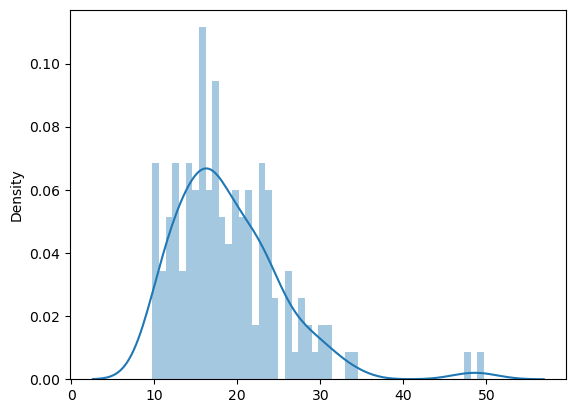

In [95]:
predictions, pred_losses = predict(model, test_dataset)

sns.distplot(pred_losses, bins= 50, kde= True);

Nous compterons les bonnes prédictions :

In [96]:
correct = sum(l <= 40 for l in pred_losses)
print(f'Correct normal precitions: {correct}/{len(test_dataset)}')

Correct normal precitions: 144/146


### Anomalies

Nous ferons de même avec les exemples d'anomalies, mais leur nombre est beaucoup plus élevé. Nous obtiendrons un sous-ensemble qui a la même taille que les battements de cœur normaux :

In [97]:
anomaly_dataset = test_anomaly_dataset[:len(test_dataset)]

Maintenant, nous pouvons prendre les prédictions de notre modèle pour le sous-ensemble d'anomalies :

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_15528\1734349305.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_losses, bins= 50, kde= True);


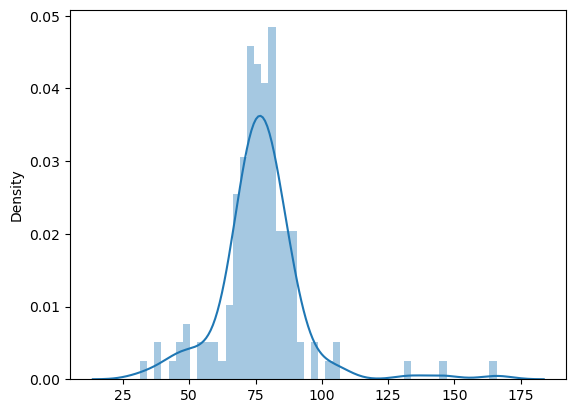

In [98]:
predictions, pred_losses = predict(model, anomaly_dataset)

sns.distplot(pred_losses, bins= 50, kde= True);

Enfin, nous pouvons compter le nombre d'exemples au-dessus du seuil (considérés comme des anomalies) :

In [99]:
correct = sum(l > 40 for l in pred_losses)
print(f'Correct anomaly precitions: {correct}/{len(anomaly_dataset)}')

Correct anomaly precitions: 143/146


Nous obtenons de très bons résultats. Dans le monde réel, vous pouvez modifier le seuil en fonction du type d'erreurs que vous souhaitez tolérer. Dans ce cas, vous pourriez vouloir avoir plus de faux positifs (battements de cœur normaux considérés comme des anomalies) que de faux négatifs (anomalies considérées comme normales).